# Лабораторная работа №10: Генетический алгоритм
***
## Постановка задачи
Разработка приложения генерации учебного расписания. 
Задача: сгенерировать распитсание, которое содержит максимальное общее кол-во разных занятий.
Требования:
- 1) Расписание генерируется на N дней (размер учебной недели);
- 2) Расписание ограничено общим количеством учебных часов;
- 3) Заннятие в расписании должны быть равномерно распределены.

**Создание набора данных**

In [2]:
from dataclasses import dataclass as ds
import pandas as pd

@ds(init=False)
class l:
    name: str;
    cntl: int; # кол-во занятий подряд  

    def __init__(self, name: str, cntl: int) -> None:
        self.name = name
        self.cntl = cntl

ls = [
    l("Русский язык", 3),
    l("Математика", 3),
    l("Информатика", 3),
    l("Английский", 2),
    l("Физика", 2),
    l("Химия", 2),
    l("Литература", 2),
    l("История", 2),
    l("Физкультура", 1),
    l("Технология", 1),
    l("Музыка", 1),
    l("Биология", 1),
    l("География", 1),
    l("Рисование", 1),
    l("окно", 1)
]
EMPTY = 14

df = pd.DataFrame(columns=["name", "cntl"])
for item in ls:
    df.loc[len(df.index)] = [item.name, item.cntl]
df

,name,cntl
0,Русский язык,3
1,Математика,3
2,Информатика,3
3,Английский,2
4,Физика,2
5,Химия,2
6,Литература,2
7,История,2
8,Физкультура,1
9,Технология,1


## Проектирование вида хромосомы
 - Хромосома содержит перечень занятий
 - Размер хромосомы задается COUNT_LESSON_DAY x WEEK_SIZE
 - Каждый элемент такого списка будет являться ссылкой на некоторое занятий из набора данных

In [3]:
from typing import List
from pandas import DataFrame

""" Функция вывода хромосомы """
def get_chrom_list(df:DataFrame, data: List[List[int]]) -> List[List[str]]:
    return [[str(df.loc[i]["name"]) for i in item] for item in data]

## Функция генерации начальной популяции
Данная функция генерирует N хромосом особей начальной популции. Каждая хромосома представляет собой расписаний занятий, где ген есть ссылка на занятие. Решением будет хромосома, которое содержит максимальное число разных занятий, равномерно распределенных по дням.

Функция реализует самый простой способ генерации популяции -- (дробовик).

In [4]:
import numpy as np

""" time-table settings"""
ONE_LESSON_HOUR = 1
COUNT_LESSON_DAY = 4
WEEK_SIZE = 6

""" population settings"""
POPULATION_SIZE = 25
GENE_SIZE = COUNT_LESSON_DAY * WEEK_SIZE

""" Инициализируем список population. Пока кол-во популяций меньше заданного кол-ва, создаем хромосомы.
    Хромосома -- список размера COUNT_LESSON_DAY x WEEK_SIZE.
    Перебираем каждую гену в хромосоме, получаем случайное занятие из масива ls. Заполняем хромосому элементами 
    указанное количество раз для конкреттного элемента(занятия), при условии что оно умещается. 
"""
def population_init(ls: List[int], population_count: int, gene_size: int) -> List[List[int]]:
    population: List[List[int]] = []
    count_lesson_day = COUNT_LESSON_DAY
    while len(population) < population_count:
        chrom: List[int] = [-1] * gene_size
        lesson = ls[EMPTY]
        lscntl = 0
        for pos in range(gene_size):
            if (count_lesson_day == 0): count_lesson_day = COUNT_LESSON_DAY
            if (lscntl == 0): 
                rnd = np.random.choice(range(len(ls)))
                lesson = ls[rnd] 
                lscntl = df['cntl'].iloc[rnd]
            if (lscntl <= count_lesson_day):
                chrom[pos] = lesson
                lscntl -= 1
                count_lesson_day -= 1
            else:
                chrom[pos] = ls[EMPTY]
                lscntl = 0
                count_lesson_day -= 1
        population.append(chrom)
    return population

def print_chrom(data: List[List[str]]):
    for row in data:
        print(row)

population = population_init(list(df.index.values), POPULATION_SIZE, GENE_SIZE)
print_chrom(get_chrom_list(df, population))

['Рисование', 'История', 'История', 'География', 'Биология', 'Физика', 'Физика', 'окно', 'Технология', 'Английский', 'Английский', 'окно', 'География', 'Музыка', 'окно', 'окно', 'Химия', 'Химия', 'Химия', 'Химия', 'Физика', 'Физика', 'окно', 'окно']
['Музыка', 'История', 'История', 'окно', 'Рисование', 'Информатика', 'Информатика', 'Информатика', 'Физкультура', 'Рисование', 'Технология', 'окно', 'География', 'Рисование', 'окно', 'окно', 'Русский язык', 'Русский язык', 'Русский язык', 'География', 'История', 'История', 'окно', 'окно']
['Математика', 'Математика', 'Математика', 'Рисование', 'Физика', 'Физика', 'География', 'окно', 'Математика', 'Математика', 'Математика', 'окно', 'Физкультура', 'Русский язык', 'Русский язык', 'Русский язык', 'Информатика', 'Информатика', 'Информатика', 'География', 'Технология', 'Химия', 'Химия', 'окно']
['Химия', 'Химия', 'Английский', 'Английский', 'Физкультура', 'Английский', 'Английский', 'окно', 'География', 'Физика', 'Физика', 'окно', 'Технология',

## Фитнес функция
Фитнес функция основана на методы подсчета частоты конкретного занятия в хромосоме и его скользящей.
Для оценки решения рассчитывается сумма отклонений частот занятий от их скользящих. Предполагается что чем ниже будет значение суммы отклонений (возвращаемое значение функции), тем оптимальнее решение, занятие более равномерно распределены по учебным дням.

0.6704545454545453

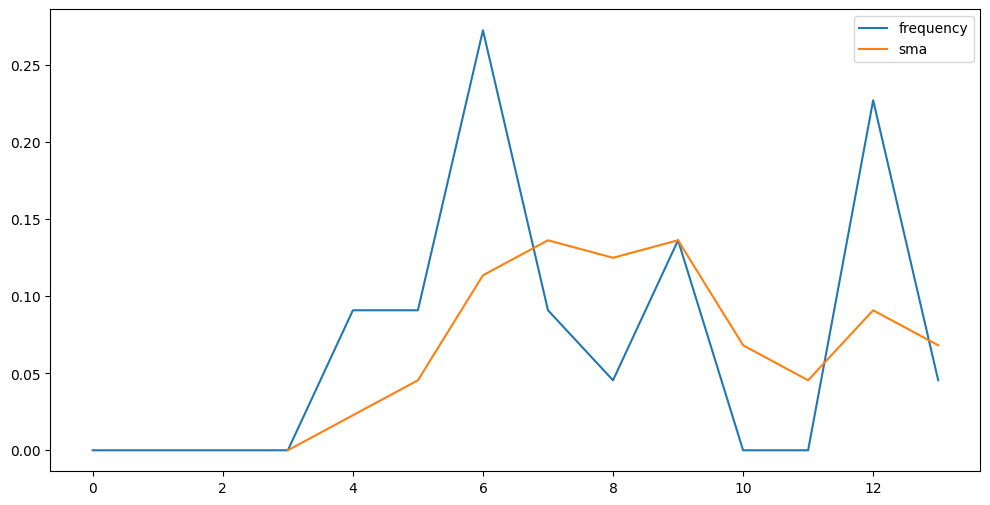

In [5]:
import matplotlib.pyplot as plt
def fitness(chrom: List[int], debug = False) -> float:
    bag:List[int] = [0] * (df.shape[0] - 1)
    total_gen = 0
    for gen in chrom:
        if (gen == EMPTY): continue
        total_gen += 1
        bag[gen] += 1
    for i in range(len(bag)):
        bag[i] /= total_gen
    bagdf = pd.DataFrame({'frequency':bag})
    bagdf['sma'] = bagdf['frequency'].rolling(window=COUNT_LESSON_DAY).mean()
    bagdf['dif'] = abs(bagdf['frequency'] - bagdf['sma'])

    if debug:
        plt.figure(figsize=(12, 6))
        plt.plot(bagdf['frequency'], label="frequency")
        plt.plot(bagdf['sma'], label="sma")
        plt.legend()
        plt.show

    return bagdf['dif'].sum()

display(fitness([12, 6, 6, 9, 9, 6, 6, 12, 12, 8, 13, 14, 5, 5, 4, 4, 9, 6, 6, 14, 7, 7, 12, 12], True))

## Оператор кроссинговера

In [9]:
def crossover(item1: List[int], item2:List[int]) -> List[int]:
    points: List[list[int]] = []
    
    i = 0
    for j in range(WEEK_SIZE):
        span:List[int] = [-1, -1]
        span[0] = i
        i += COUNT_LESSON_DAY
        span[1] = i - 1
        points.append(span)

    rnd = np.random.choice(range(WEEK_SIZE))
    item1[points[rnd][0]:points[rnd][1]+1] = item2[points[rnd][0]:points[rnd][1]+1]
    return item1

print("Исходные:")
a = [0, 0, 0, 14, 10, 13, 14, 9, 12, 14, 9, 14, 1, 1, 1, 10, 1, 1, 1, 14, 13, 0, 0, 0]
b = [5, 5, 5, 5, 0, 0, 0, 12, 1, 1, 1, 11, 5, 5, 10, 14, 2, 2, 2, 12, 10, 10, 14, 14]
print_chrom(get_chrom_list(df, [a, b]))
print("Оператор кроссинговера:")
for i in range(4):
    print_chrom(get_chrom_list(df, [crossover(a.copy(),b.copy())]))

Исходные:
['Русский язык', 'Русский язык', 'Русский язык', 'окно', 'Музыка', 'Рисование', 'окно', 'Технология', 'География', 'окно', 'Технология', 'окно', 'Математика', 'Математика', 'Математика', 'Музыка', 'Математика', 'Математика', 'Математика', 'окно', 'Рисование', 'Русский язык', 'Русский язык', 'Русский язык']
['Химия', 'Химия', 'Химия', 'Химия', 'Русский язык', 'Русский язык', 'Русский язык', 'География', 'Математика', 'Математика', 'Математика', 'Биология', 'Химия', 'Химия', 'Музыка', 'окно', 'Информатика', 'Информатика', 'Информатика', 'География', 'Музыка', 'Музыка', 'окно', 'окно']
Оператор кроссинговера:
['Русский язык', 'Русский язык', 'Русский язык', 'окно', 'Музыка', 'Рисование', 'окно', 'Технология', 'Математика', 'Математика', 'Математика', 'Биология', 'Математика', 'Математика', 'Математика', 'Музыка', 'Математика', 'Математика', 'Математика', 'окно', 'Рисование', 'Русский язык', 'Русский язык', 'Русский язык']
['Химия', 'Химия', 'Химия', 'Химия', 'Музыка', 'Рисование